# Exercise 3.2: Tree Maps, Area and Stacked Area Charts
#### Scott Breitbach
#### DSC640 - 01/13/2022

# Plots Using **Python**

## Load Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load data
unempDF = pd.read_csv('unemployement-rate-1948-2010.csv')
expenDF = pd.read_csv('expenditures.csv')

## Tree Map

In [3]:
# Load libraries
import squarify

In [4]:
# Group expenses by category
expenCat = expenDF.groupby('category').sum()

# Set up values for chart
size = expenCat.expenditure
labels = expenCat.index

In [5]:
# Set up color palette, mapped to values
cmap = matplotlib.cm.Spectral # Blues is pretty good too
mini = min(size)
maxi = max(size)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in size]

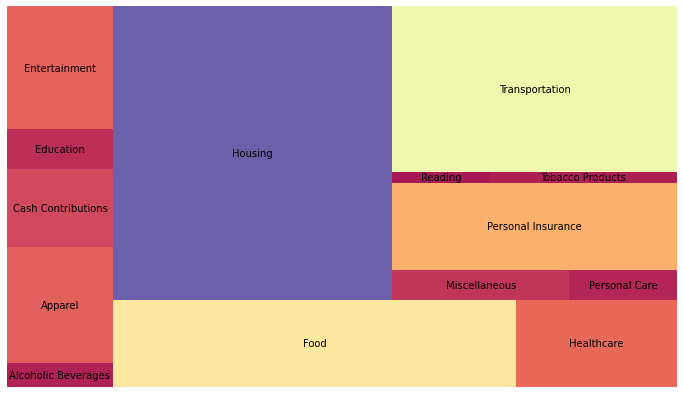

In [6]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 7))

# Plot tree map using squarify and matplotlib
squarify.plot(sizes = size, 
              label = labels, 
              alpha = 0.9, 
              color = colors)
plt.axis('off')
plt.show()